# Pandas 103: Data Aggregatation

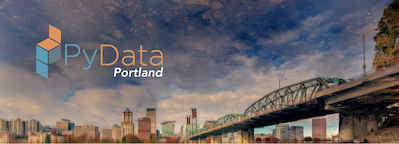

Vishal Bakshi  
Follow us on Twitter @pydatapdx

In [1]:
import pandas as pd
import numpy as np

## Load Data and Clean Column Names

In [2]:
# load the data and view the first few rows
data = pd.read_csv("2021_salary_survey.csv")
data.head()

,Timestamp,How old are you?,Industry,Job title,Additional context on job title,Annual salary,Other monetary comp,Currency,Currency - other,Additional context on income,Country,State,City,Overall years of professional experience,Years of experience in field,Highest level of education completed,Gender,Race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White


In [3]:
# what are the columns?
data.columns

Index(['Timestamp', 'How old are you?', 'Industry', 'Job title',
       'Additional context on job title', 'Annual salary',
       'Other monetary comp', 'Currency', 'Currency - other',
       'Additional context on income', 'Country', 'State', 'City',
       'Overall years of professional experience',
       'Years of experience in field', 'Highest level of education completed',
       'Gender', 'Race'],
      dtype='object')

In [4]:
# rename some of the columns
column_name_mapping={
    'How old are you?': 'age', 
    'Job title': 'job',
    'Additional context on job title': 'job_context',
    'Annual salary': 'salary',
    'Other monetary comp': 'other_comp',
    'Currency - other': 'other_currency',
    'Additional context on income': 'income_context',
    'Overall years of professional experience': 'total_exp',
    'Years of experience in field': 'field_exp',
    'Highest level of education completed': 'highest_ed'}

# save the old columns names
# data.columns = old_column_index
old_column_index = data.columns

In [5]:
# rename DataFrame columns
data = data.rename(columns=column_name_mapping)

# convert DataFrame column names to lowercase
data = data.rename(columns=str.lower)
data

,timestamp,age,industry,job,job_context,salary,other_comp,currency,other_currency,income_context,country,state,city,total_exp,field_exp,highest_ed,gender,race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,"55,000",0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,"54,600",4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,"34,000",NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,"62,000",3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,"60,000",7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26094,5/12/2021 11:15:57,25-34,Retail,Executive Assistant,NaN,46800,2000.0,CAD,NaN,NaN,Canada,NaN,Niagara Falls,11 - 20 years,5-7 years,Some college,Non-binary,White
26095,5/12/2021 11:42:47,25-34,Sales,Digital Experience Expert,I do tech and sales support for a company that...,37000,NaN,USD,NaN,Also get commission for sales but that varies ...,United States of America,Minnesota,Minneapolis,11 - 20 years,2 - 4 years,College degree,Non-binary,"Black or African American, White"
26096,5/12/2021 11:43:41,35-44,Government and Public Administration,Senior Analyst,NaN,97000,0.0,USD,NaN,NaN,US,District of Columbia,Washington,5-7 years,2 - 4 years,Master's degree,Woman,White
26097,5/12/2021 12:18:24,25-34,Media & Digital,Editor in chief,"I am the editor of a newspaper, meaning I assi...",32000,0.0,USD,NaN,NaN,United States,Missouri,Fulton,2 - 4 years,2 - 4 years,College degree,Other or prefer not to answer,White


In [6]:
# how many missing values are there?
data.isnull().sum()

timestamp             0
age                   0
industry             58
job                   0
job_context       19362
salary                0
other_comp         6753
currency              0
other_currency    25933
income_context    23241
country               0
state              4675
city                 70
total_exp             0
field_exp             0
highest_ed          195
gender              147
race                145
dtype: int64

In [7]:
# what are the DataTypes of values in each column?
data.dtypes

timestamp          object
age                object
industry           object
job                object
job_context        object
salary             object
other_comp        float64
currency           object
other_currency     object
income_context     object
country            object
state              object
city               object
total_exp          object
field_exp          object
highest_ed         object
gender             object
race               object
dtype: object

## Re-Import the Data

In [8]:
# store lowercase column names
lowercase_names = data.columns

In [9]:
# read in the data again
data = pd.read_csv('2021_salary_survey.csv', thousands=r',', names=lowercase_names, header=0)
data

,timestamp,age,industry,job,job_context,salary,other_comp,currency,other_currency,income_context,country,state,city,total_exp,field_exp,highest_ed,gender,race
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26094,5/12/2021 11:15:57,25-34,Retail,Executive Assistant,NaN,46800,2000.0,CAD,NaN,NaN,Canada,NaN,Niagara Falls,11 - 20 years,5-7 years,Some college,Non-binary,White
26095,5/12/2021 11:42:47,25-34,Sales,Digital Experience Expert,I do tech and sales support for a company that...,37000,NaN,USD,NaN,Also get commission for sales but that varies ...,United States of America,Minnesota,Minneapolis,11 - 20 years,2 - 4 years,College degree,Non-binary,"Black or African American, White"
26096,5/12/2021 11:43:41,35-44,Government and Public Administration,Senior Analyst,NaN,97000,0.0,USD,NaN,NaN,US,District of Columbia,Washington,5-7 years,2 - 4 years,Master's degree,Woman,White
26097,5/12/2021 12:18:24,25-34,Media & Digital,Editor in chief,"I am the editor of a newspaper, meaning I assi...",32000,0.0,USD,NaN,NaN,United States,Missouri,Fulton,2 - 4 years,2 - 4 years,College degree,Other or prefer not to answer,White


In [10]:
# check dtypes
data.dtypes

timestamp          object
age                object
industry           object
job                object
job_context        object
salary              int64
other_comp        float64
currency           object
other_currency     object
income_context     object
country            object
state              object
city               object
total_exp          object
field_exp          object
highest_ed         object
gender             object
race               object
dtype: object

In [11]:
# currency values
data['currency'].unique()

array(['USD', 'GBP', 'CAD', 'EUR', 'AUD/NZD', 'Other', 'CHF', 'ZAR',
       'SEK', 'HKD', 'JPY'], dtype=object)

In [12]:
# convert all currencies to USD using apply
currency_map = {
    'USD': 1.00,
    'GBP': 1.41,
    'CAD': 0.83,
    'EUR': 1.21,
    'AUD/NZD': 0.72,
    'CHF': 1.10,
    'ZAR': 0.071,
    'SEK': 0.12,
    'HKD': 0.13,
    'JPY': 0.0091,
    'Other': np.nan
}

# store in a separate column
data['salary_usd'] = data.apply(lambda x: currency_map[x['currency']] * x['salary'], axis=1)

In [13]:
# illustrate .apply method
df = pd.DataFrame(data={"A": [1,2,3], "B": [4,5,6]})
df

,A,B
0,1,4
1,2,5
2,3,6


In [14]:
# iterate over columns, with access to row labels
df.apply(print, axis=0)

0    1
1    2
2    3
Name: A, dtype: int64
0    4
1    5
2    6
Name: B, dtype: int64


A    None
B    None
dtype: object

In [15]:
# iterate over rows, with access to column labels
df.apply(print, axis=1)

A    1
B    4
Name: 0, dtype: int64
A    2
B    5
Name: 1, dtype: int64
A    3
B    6
Name: 2, dtype: int64


0    None
1    None
2    None
dtype: object

In [16]:
# write a named function to use with .apply
def convert_to_usd(row):
    return currency_map[row['currency']] * row['salary']

data.apply(convert_to_usd, axis=1)

0        55000.0
1        76986.0
2        34000.0
3        62000.0
4        60000.0
          ...   
26094    38844.0
26095    37000.0
26096    97000.0
26097    32000.0
26098    61951.0
Length: 26099, dtype: float64

In [17]:
# check the "salary_usd" column
data.head()

,timestamp,age,industry,job,job_context,salary,other_comp,currency,other_currency,income_context,country,state,city,total_exp,field_exp,highest_ed,gender,race,salary_usd
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,United States,Massachusetts,Boston,5-7 years,5-7 years,Master's degree,Woman,White,55000.0
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,United Kingdom,NaN,Cambridge,8 - 10 years,5-7 years,College degree,Non-binary,White,76986.0
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,US,Tennessee,Chattanooga,2 - 4 years,2 - 4 years,College degree,Woman,White,34000.0
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,USA,Wisconsin,Milwaukee,8 - 10 years,5-7 years,College degree,Woman,White,62000.0
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,US,South Carolina,Greenville,8 - 10 years,5-7 years,College degree,Woman,White,60000.0


In [18]:
# how many responses had 'Other' currencies?
len(data[data['currency'] == 'Other'])

133

## Define Our Questions

Which type of questions will we not explore today?

- *How much does salary depend on ________?*


Which type of questions will we explore?

- _How do we aggregate data to assist analysis?_

## Aggregating the Data

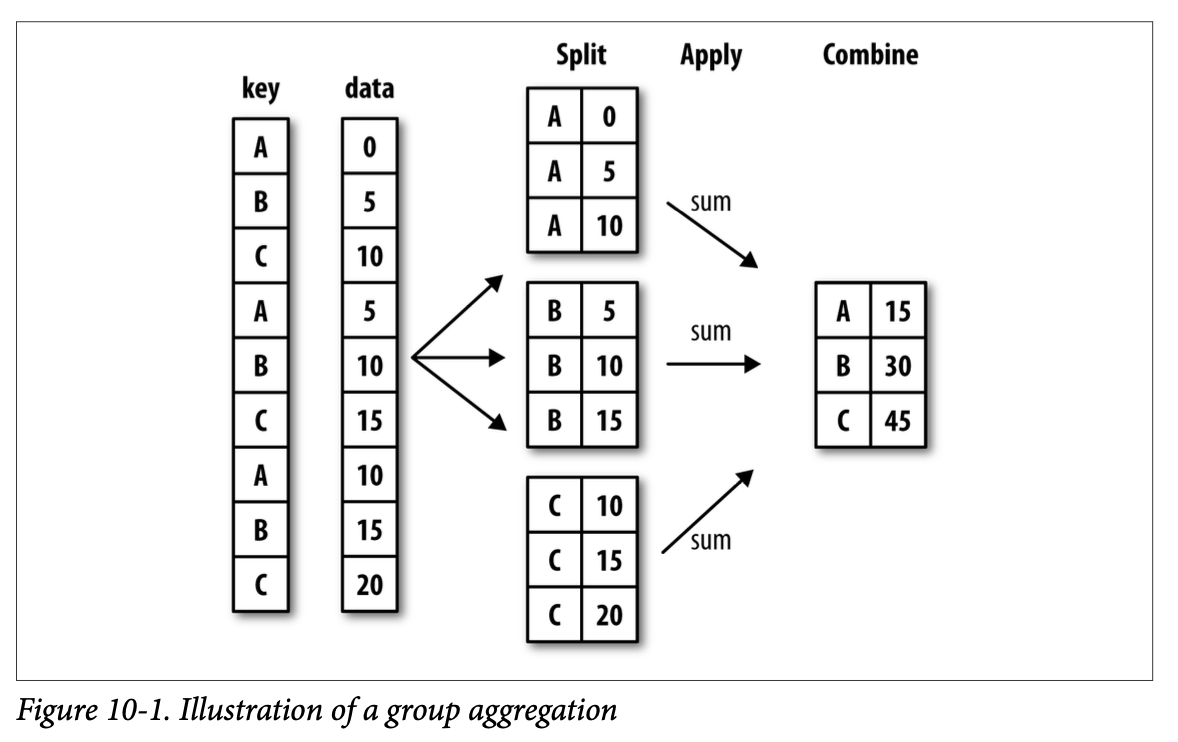
_Source: [Python for Data Analysis by Wes McKinney](https://github.com/wesm/pydata-book)_

In [19]:
# How many responses were there for each industry?
data.groupby('industry')['timestamp'].count()

industry
 Buyer                                1
 Veterinary medicine                  1
"Government Relations" (Lobbying)     1
Academia                              4
Academia                              1
                                     ..
trade association/membership          1
translation                           1
veterinary biotech                    1
video games                           1
wholesale distribution                3
Name: timestamp, Length: 1148, dtype: int64

In [21]:
# What were the most common industries in the survey?
data.groupby('industry')['timestamp'].count().nlargest(10)

industry
Computing or Tech                       4339
Education (Higher Education)            2348
Nonprofits                              2319
Government and Public Administration    1812
Health care                             1733
Accounting, Banking & Finance           1680
Engineering or Manufacturing            1512
Marketing, Advertising & PR             1053
Law                                     1043
Education (Primary/Secondary)            801
Name: timestamp, dtype: int64

In [22]:
# call nlargest on a DataFrame
data.groupby('industry').count().nlargest(10,['timestamp', 'job_context'])

,timestamp,age,job,job_context,salary,other_comp,currency,other_currency,income_context,country,state,city,total_exp,field_exp,highest_ed,gender,race,salary_usd
industry,,,,,,,,,,,,,,,,,,
Computing or Tech,4339,4339,4339,803,4339,3327,4339,44,614,4339,3426,4327,4339,4339,4301,4317,4314,4300
Education (Higher Education),2348,2348,2348,773,2348,1508,2348,11,237,2348,1967,2333,2348,2348,2331,2332,2329,2339
Nonprofits,2319,2319,2319,601,2319,1493,2319,6,141,2319,2033,2315,2319,2319,2303,2307,2304,2313
Government and Public Administration,1812,1812,1812,521,1812,1214,1812,10,142,1812,1341,1807,1812,1812,1805,1806,1805,1803
Health care,1733,1733,1733,502,1733,1297,1733,8,175,1733,1480,1730,1733,1733,1723,1721,1725,1726
"Accounting, Banking & Finance",1680,1680,1680,384,1680,1406,1680,6,141,1680,1364,1676,1680,1680,1667,1669,1666,1675
Engineering or Manufacturing,1512,1512,1512,411,1512,1216,1512,10,131,1512,1266,1507,1512,1512,1507,1502,1500,1504
"Marketing, Advertising & PR",1053,1053,1053,234,1053,783,1053,7,98,1053,851,1053,1053,1053,1045,1046,1047,1046
Law,1043,1043,1043,302,1043,814,1043,4,139,1043,913,1042,1043,1043,1029,1033,1038,1039


In [23]:
# change industry values to lowercase
data['industry_lowercase'] = data['industry'].apply(lambda x: str(x).strip().lower())

In [24]:
data.groupby('industry_lowercase')['salary_usd'].count()

industry_lowercase
"government relations" (lobbying)       1
academia                                5
academia - stem                         1
academia / research                     1
academia--cell and molecular biology    1
                                       ..
work-study                              1
workforce development                   1
writing and journalism                  1
zoo                                     1
zoos and aquariums                      1
Name: salary_usd, Length: 953, dtype: int64

In [25]:
# How many responses are included in the top 10 industries?
data.groupby('industry_lowercase')['timestamp'].count().nlargest(10).sum()

18640

## Aggregating Data Using Multiple Keys

In [26]:
# Calculate multiple group operations on multiple columns
grouped = data.groupby(['gender', 'total_exp'])['salary_usd']
grouped.agg(['count', 'mean', 'var', 'std'])

count           mean  \
gender                        total_exp                                
Man                           1 year or less       68   67866.738529   
                              11 - 20 years      1775  121055.251668   
                              2 - 4 years         408   77794.053333   
                              21 - 30 years       755  132577.897987   
                              31 - 40 years       160  127654.527438   
                              41 years or more     35  113420.742857   
                              5-7 years           707   91937.650212   
                              8 - 10 years        768  241000.543047   
Non-binary                    1 year or less       22   45228.769091   
                              11 - 20 years       175   84289.800743   
                              2 - 4 years         123   72596.400732   
                              21 - 30 years        46  114107.139130   
                              31 - 40 years         2   57795.000000   
                              5-7 years           192   62453.131458   
                              8 - 10 years        147   69090.406803   
Other or prefer not to answer 1 year or less        6   69933.333333   
                              11 - 20 years        80  101610.825000   
                              2 - 4 years          25   68877.800000   
                              21 - 30 years        37  115046.756757   
                              31 - 40 years        13  151703.846154   
                              41 years or more      2  105000.000000   
                              5-7 years            49   67286.150000   
                              8 - 10 years         51   82024.829412   
Prefer not to answer          1 year or less        1   88000.000000   
Woman                         1 year or less      321   66377.115950   
                              11 - 20 years      6986   90116.626005   
                              2 - 4 years        2069   66077.163171   
                              21 - 30 years      2587   94950.560707   
                              31 - 40 years       634   90335.234779   
                              41 years or more     78   85520.525641   
                              5-7 years          3493   75384.137512   
                              8 - 10 years       4004   82014.030180   

                                                         var           std  
gender                        total_exp                                     
Man                           1 year or less    1.862363e+09  4.315511e+04  
                              11 - 20 years     7.886573e+09  8.880638e+04  
                              2 - 4 years       2.613599e+09  5.112337e+04  
                              21 - 30 years     5.792432e+09  7.610803e+04  
                              31 - 40 years     4.112907e+09  6.413195e+04  
                              41 years or more  2.966664e+09  5.446709e+04  
                              5-7 years         5.918470e+09  7.693159e+04  
                              8 - 10 years      1.352707e+13  3.677916e+06  
Non-binary                    1 year or less    3.611499e+08  1.900394e+04  
                              11 - 20 years     2.826545e+09  5.316526e+04  
                              2 - 4 years       1.429332e+10  1.195547e+05  
                              21 - 30 years     1.098716e+10  1.048197e+05  
                              31 - 40 years     5.715580e+08  2.390728e+04  
                              5-7 years         1.481521e+09  3.849053e+04  
                              8 - 10 years      2.373864e+09  4.872231e+04  
Other or prefer not to answer 1 year or less    4.139667e+08  2.034617e+04  
                              11 - 20 years     2.916563e+09  5.400522e+04  
                              2 - 4 years       1.355458e+09  3.681655e+04  
                              21 - 30 years     8.973228e+0

In [27]:
# map old to new values
total_exp_map = {
    '1 year or less': '00 - 01 years',
    '2 - 4 years': '02 - 04 years',
    '5-7 years': '05 - 07 years',
    '8 - 10 years': '08 - 10 years',
    '11 - 20 years': '11 - 20 years',
    '21 - 30 years': '21 - 30 years',
    '31 - 40 years': '31 - 40 years',
    '41 years or more': '41 - more years'
}

data['total_exp'] = data['total_exp'].map(total_exp_map)

In [28]:
# Calculate multiple group operations on multiple columns
grouped = data.groupby(['gender', 'total_exp'])['salary_usd']
grouped.agg(['count', 'mean', 'var', 'std'])

count           mean  \
gender                        total_exp                               
Man                           00 - 01 years       68   67866.738529   
                              02 - 04 years      408   77794.053333   
                              05 - 07 years      707   91937.650212   
                              08 - 10 years      768  241000.543047   
                              11 - 20 years     1775  121055.251668   
                              21 - 30 years      755  132577.897987   
                              31 - 40 years      160  127654.527438   
                              41 - more years     35  113420.742857   
Non-binary                    00 - 01 years       22   45228.769091   
                              02 - 04 years      123   72596.400732   
                              05 - 07 years      192   62453.131458   
                              08 - 10 years      147   69090.406803   
                              11 - 20 years      175   84289.800743   
                              21 - 30 years       46  114107.139130   
                              31 - 40 years        2   57795.000000   
Other or prefer not to answer 00 - 01 years        6   69933.333333   
                              02 - 04 years       25   68877.800000   
                              05 - 07 years       49   67286.150000   
                              08 - 10 years       51   82024.829412   
                              11 - 20 years       80  101610.825000   
                              21 - 30 years       37  115046.756757   
                              31 - 40 years       13  151703.846154   
                              41 - more years      2  105000.000000   
Prefer not to answer          00 - 01 years        1   88000.000000   
Woman                         00 - 01 years      321   66377.115950   
                              02 - 04 years     2069   66077.163171   
                              05 - 07 years     3493   75384.137512   
                              08 - 10 years     4004   82014.030180   
                              11 - 20 years     6986   90116.626005   
                              21 - 30 years     2587   94950.560707   
                              31 - 40 years      634   90335.234779   
                              41 - more years     78   85520.525641   

                                                        var           std  
gender                        total_exp                                    
Man                           00 - 01 years    1.862363e+09  4.315511e+04  
                              02 - 04 years    2.613599e+09  5.112337e+04  
                              05 - 07 years    5.918470e+09  7.693159e+04  
                              08 - 10 years    1.352707e+13  3.677916e+06  
                              11 - 20 years    7.886573e+09  8.880638e+04  
                              21 - 30 years    5.792432e+09  7.610803e+04  
                              31 - 40 years    4.112907e+09  6.413195e+04  
                              41 - more years  2.966664e+09  5.446709e+04  
Non-binary                    00 - 01 years    3.611499e+08  1.900394e+04  
                              02 - 04 years    1.429332e+10  1.195547e+05  
                              05 - 07 years    1.481521e+09  3.849053e+04  
                              08 - 10 years    2.373864e+09  4.872231e+04  
                              11 - 20 years    2.826545e+09  5.316526e+04  
                              21 - 30 years    1.098716e+10  1.048197e+05  
                              31 - 40 years    5.715580e+08  2.390728e+04  
Other or prefer not to answer 00 - 01 years    4.139667e+08  2.034617e+04  
                              02 - 04 years    1.355458e+09  3.681655e+04  
                              05 - 07 years    1.080345e+09  3.286860e+04  
                              08 - 10 years    1.685989e+09  4.106079e+04  
                              11 - 2

In [29]:
# which subgroup combinations had the most responses?
grouped = data.groupby(['gender', 'total_exp'])['salary_usd']
grouped.agg(['count', 'mean']).nlargest(10, columns=['count'])

count           mean
gender total_exp                          
Woman  11 - 20 years   6986   90116.626005
       08 - 10 years   4004   82014.030180
       05 - 07 years   3493   75384.137512
       21 - 30 years   2587   94950.560707
       02 - 04 years   2069   66077.163171
Man    11 - 20 years   1775  121055.251668
       08 - 10 years    768  241000.543047
       21 - 30 years    755  132577.897987
       05 - 07 years    707   91937.650212
Woman  31 - 40 years    634   90335.234779

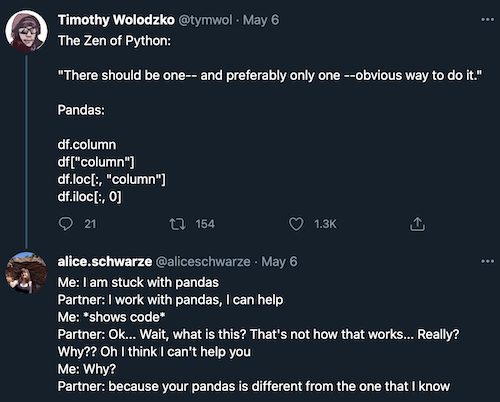  

[Link to tweet](https://twitter.com/aliceschwarze/status/1390478008494936064?s=20)

In [30]:
# View a pivot table
data.pivot_table(values='salary_usd', index=['gender', 'total_exp'])

salary_usd
gender                        total_exp                     
Man                           00 - 01 years     67866.738529
                              02 - 04 years     77794.053333
                              05 - 07 years     91937.650212
                              08 - 10 years    241000.543047
                              11 - 20 years    121055.251668
                              21 - 30 years    132577.897987
                              31 - 40 years    127654.527438
                              41 - more years  113420.742857
Non-binary                    00 - 01 years     45228.769091
                              02 - 04 years     72596.400732
                              05 - 07 years     62453.131458
                              08 - 10 years     69090.406803
                              11 - 20 years     84289.800743
                              21 - 30 years    114107.139130
                              31 - 40 years     57795.000000
Other or prefer not to answer 00 - 01 years     69933.333333
                              02 - 04 years     68877.800000
                              05 - 07 years     67286.150000
                              08 - 10 years     82024.829412
                              11 - 20 years    101610.825000
                              21 - 30 years    115046.756757
                              31 - 40 years    151703.846154
                              41 - more years  105000.000000
Prefer not to answer          00 - 01 years     88000.000000
Woman                         00 - 01 years     66377.115950
                              02 - 04 years     66077.163171
                              05 - 07 years     75384.137512
                              08 - 10 years     82014.030180
                              11 - 20 years     90116.626005
                              21 - 30 years     94950.560707
                              31 - 40 years     90335.234779
                              41 - more years   85520.525641

In [31]:
# View a pivot table with more than one aggregate function
data.pivot_table('salary_usd', index=['gender', 'total_exp'], aggfunc=['count', 'mean', 'var', 'std'])

count           mean  \
                                              salary_usd     salary_usd   
gender                        total_exp                                   
Man                           00 - 01 years           68   67866.738529   
                              02 - 04 years          408   77794.053333   
                              05 - 07 years          707   91937.650212   
                              08 - 10 years          768  241000.543047   
                              11 - 20 years         1775  121055.251668   
                              21 - 30 years          755  132577.897987   
                              31 - 40 years          160  127654.527438   
                              41 - more years         35  113420.742857   
Non-binary                    00 - 01 years           22   45228.769091   
                              02 - 04 years          123   72596.400732   
                              05 - 07 years          192   62453.131458   
                              08 - 10 years          147   69090.406803   
                              11 - 20 years          175   84289.800743   
                              21 - 30 years           46  114107.139130   
                              31 - 40 years            2   57795.000000   
Other or prefer not to answer 00 - 01 years            6   69933.333333   
                              02 - 04 years           25   68877.800000   
                              05 - 07 years           49   67286.150000   
                              08 - 10 years           51   82024.829412   
                              11 - 20 years           80  101610.825000   
                              21 - 30 years           37  115046.756757   
                              31 - 40 years           13  151703.846154   
                              41 - more years          2  105000.000000   
Prefer not to answer          00 - 01 years            1   88000.000000   
Woman                         00 - 01 years          321   66377.115950   
                              02 - 04 years         2069   66077.163171   
                              05 - 07 years         3493   75384.137512   
                              08 - 10 years         4004   82014.030180   
                              11 - 20 years         6986   90116.626005   
                              21 - 30 years         2587   94950.560707   
                              31 - 40 years          634   90335.234779   
                              41 - more years         78   85520.525641   

                                                        var           std  
                                                 salary_usd    salary_usd  
gender                        total_exp                                    
Man                           00 - 01 years    1.862363e+09  4.315511e+04  
                              02 - 04 years    2.613599e+09  5.112337e+04  
                              05 - 07 years    5.918470e+09  7.693159e+04  
                              08 - 10 years    1.352707e+13  3.677916e+06  
                              11 - 20 years    7.886573e+09  8.880638e+04  
                              21 - 30 years    5.792432e+09  7.610803e+04  
                              31 - 40 years    4.112907e+09  6.413195e+04  
                              41 - more years  2.966664e+09  5.446709e+04  
Non-binary                    00 - 01 years    3.611499e+08  1.900394e+04  
                              02 - 04 years    1.429332e+10  1.195547e+05  
                              05 - 07 years    1.481521e+09  3.849053e+04  
                              08 - 10 years    2.373864e+09  4.872231e+04  
                              11 - 20 years    2.826545e+09  5.316526e+04  
                              21 - 30 years    1.098716e+10  1.048197e+05  
                              31 - 40 years    5.715580e+08  2.390728e+04  
Other or prefer not to answer 00 - 01 years    4.139667e+

In [33]:
# cross-tabulation of counts between gender and total experience
pd.crosstab(data['gender'], data['total_exp'], margins=True)

total_exp,00 - 01 years,02 - 04 years,05 - 07 years,08 - 10 years,11 - 20 years,21 - 30 years,31 - 40 years,41 - more years,All
gender,,,,,,,,,
Man,71,418,715,773,1785,757,160,35,4714
Non-binary,22,125,192,147,175,46,2,0,709
Other or prefer not to answer,6,28,49,51,81,37,13,2,267
Prefer not to answer,1,0,0,0,0,0,0,0,1
Woman,322,2085,3506,4017,7018,2597,638,78,20261
All,422,2656,4462,4988,9059,3437,813,115,25952


In [34]:
# cross-tabulation of means between gender and total experience
pd.crosstab(data['gender'], data['total_exp'], margins=True, values=data['salary_usd'], aggfunc='mean')

total_exp,00 - 01 years,02 - 04 years,05 - 07 years,08 - 10 years,11 - 20 years,21 - 30 years,31 - 40 years,41 - more years,All
gender,,,,,,,,,
Man,67866.738529,77794.053333,91937.650212,241000.543047,121055.251668,132577.897987,127654.527438,113420.742857,133833.850047
Non-binary,45228.769091,72596.400732,62453.131458,69090.406803,84289.800743,114107.139130,57795.000000,NaN,73814.589505
Other or prefer not to answer,69933.333333,68877.800000,67286.150000,82024.829412,101610.825000,115046.756757,151703.846154,105000.000000,91975.584221
Prefer not to answer,88000.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,88000.000000
Woman,66377.115950,66077.163171,75384.137512,82014.030180,90116.626005,94950.560707,90335.234779,85520.525641,83722.816957
All,65609.151579,68230.448248,77371.027611,106199.627767,96196.473171,103719.437060,98621.759258,94350.669565,92611.187107


## Handling Multiple Categories in a Column

In [35]:
# How many unique responses to Race?
len(data['race'].unique())

48

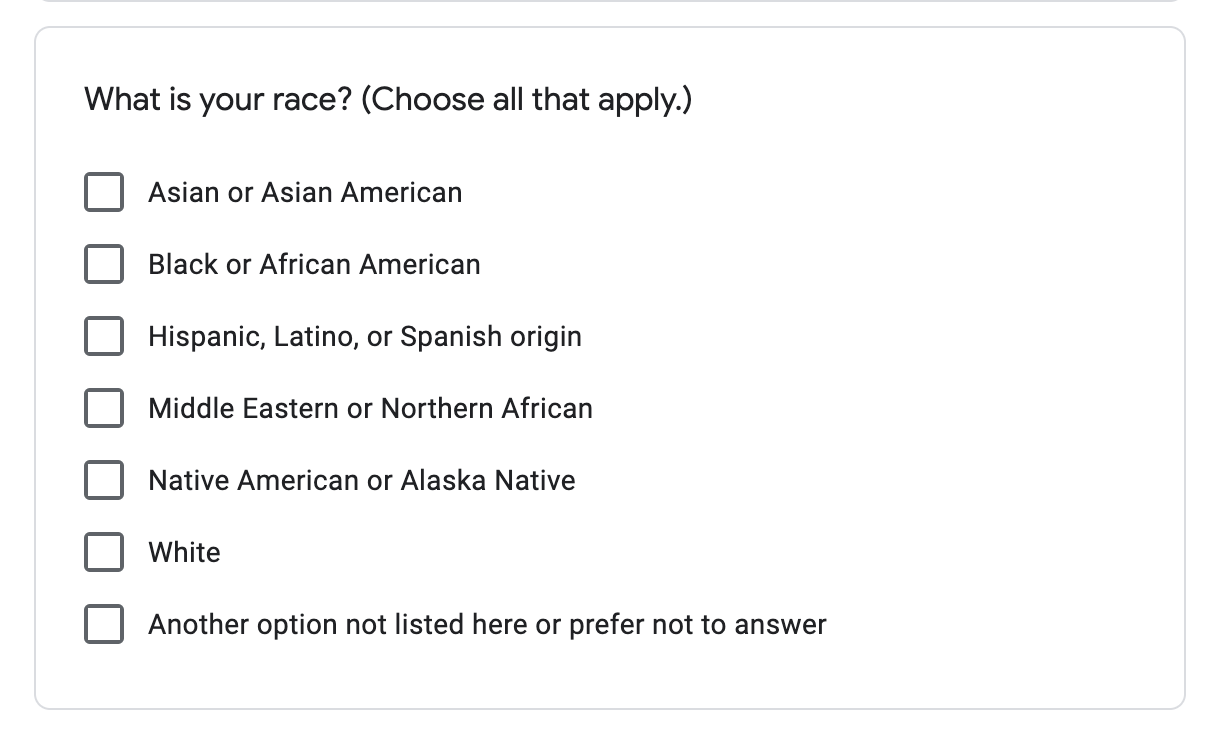
_Source: [Ask A Manager Salary Survey 2021](https://www.askamanager.org/2021/04/how-much-money-do-you-make-4.html)_

In [36]:
# Are there really 48 unique responses?
data['race'].unique()[:10]

array(['White', 'Hispanic, Latino, or Spanish origin, White',
       'Asian or Asian American, White', 'Asian or Asian American',
       'Another option not listed here or prefer not to answer',
       'Hispanic, Latino, or Spanish origin',
       'Middle Eastern or Northern African',
       'Hispanic, Latino, or Spanish origin, Middle Eastern or Northern African, White',
       'Black or African American', 'Black or African American, White'],
      dtype=object)

In [37]:
# Create new columns
races = [
    'Asian or Asian American', 
    'Black or African American', 
    'Hispanic, Latino, or Spanish origin',
    'Middle Eastern or Northern African',
    'Native American or Alaska Native',
    'White',
    'Another option not listed here or prefer not to answer']

for race in races:
    data[race] = data['race'].str.contains(race)

In [38]:
data.head()

,timestamp,age,industry,job,job_context,salary,other_comp,currency,other_currency,income_context,...,race,salary_usd,industry_lowercase,Asian or Asian American,Black or African American,"Hispanic, Latino, or Spanish origin",Middle Eastern or Northern African,Native American or Alaska Native,White,Another option not listed here or prefer not to answer
0,4/27/2021 11:02:10,25-34,Education (Higher Education),Research and Instruction Librarian,NaN,55000,0.0,USD,NaN,NaN,...,White,55000.0,education (higher education),False,False,False,False,False,True,False
1,4/27/2021 11:02:22,25-34,Computing or Tech,Change & Internal Communications Manager,NaN,54600,4000.0,GBP,NaN,NaN,...,White,76986.0,computing or tech,False,False,False,False,False,True,False
2,4/27/2021 11:02:38,25-34,"Accounting, Banking & Finance",Marketing Specialist,NaN,34000,NaN,USD,NaN,NaN,...,White,34000.0,"accounting, banking & finance",False,False,False,False,False,True,False
3,4/27/2021 11:02:41,25-34,Nonprofits,Program Manager,NaN,62000,3000.0,USD,NaN,NaN,...,White,62000.0,nonprofits,False,False,False,False,False,True,False
4,4/27/2021 11:02:42,25-34,"Accounting, Banking & Finance",Accounting Manager,NaN,60000,7000.0,USD,NaN,NaN,...,White,60000.0,"accounting, banking & finance",False,False,False,False,False,True,False


In [39]:
# view race columns
data.loc[8:12,["race", 'Asian or Asian American', 'Black or African American', 'Hispanic, Latino, or Spanish origin','Middle Eastern or Northern African','Native American or Alaska Native','White','Another option not listed here or prefer not to answer']]

,race,Asian or Asian American,Black or African American,"Hispanic, Latino, or Spanish origin",Middle Eastern or Northern African,Native American or Alaska Native,White,Another option not listed here or prefer not to answer
8,White,False,False,False,False,False,True,False
9,"Hispanic, Latino, or Spanish origin, White",False,False,True,False,False,True,False
10,White,False,False,False,False,False,True,False
11,"Hispanic, Latino, or Spanish origin, White",False,False,True,False,False,True,False
12,"Asian or Asian American, White",True,False,False,False,False,True,False


In [40]:
df = pd.DataFrame()
for race in races:
    df[race] = data[data[race] == True]['salary_usd'].apply(['mean'])
df

,Asian or Asian American,Black or African American,"Hispanic, Latino, or Spanish origin",Middle Eastern or Northern African,Native American or Alaska Native,White,Another option not listed here or prefer not to answer
mean,102703.660448,89733.10363,193679.729565,96436.045752,92872.437194,87407.118064,99509.989594


In [41]:
# view aggregate data by race
def groupby_race(data, races, column, aggfunc=['mean']):
    """
    Returns a DataFrame with:
        `races` row Index
        `aggfunc` column Index
        `column` values
        .nlargest(`top`, `order`) sorted
    
    Input:
        `data` DataFrame with `races` and `column`
        `races` list-like with rcolumn name strings
        `column` string upon which aggfuncs will be applied
        `aggfunc` list of strings
    """
    df = pd.DataFrame()
    for race in races:
        df[race] = data[data[race] == True][column].apply(aggfunc)
    return df.T

In [42]:
groupby_race(
    data=data, 
    races=races, 
    column='salary_usd', 
    aggfunc=['mean', 'count','std', 'median'])

,mean,count,std,median
Asian or Asian American,102703.660448,1564.0,8.978822e+04,87000.0
Black or African American,89733.103630,799.0,7.283829e+04,75552.0
"Hispanic, Latino, or Spanish origin",193679.729565,943.0,3.319323e+06,74000.0
Middle Eastern or Northern African,96436.045752,153.0,5.594012e+04,77000.0
Native American or Alaska Native,92872.437194,139.0,9.115323e+04,75662.8
White,87407.118064,22791.0,6.211015e+04,75000.0
Another option not listed here or prefer not to answer,99509.989594,641.0,8.785148e+04,82000.0


In [43]:
# group by "Black or African American" and gender
# calculate "count" and "mean" for `salary_usd`
df1 = data[data['Black or African American'] == True].groupby(['gender'])['salary_usd'].agg(['count', 'mean'])
df1

,count,mean
gender,,
Man,106,103204.981132
Non-binary,22,72106.586364
Other or prefer not to answer,2,53500.000000
Woman,659,88255.147041


In [44]:
# group by "Asian or Asian American" and gender
# calculate "count" and "mean" for `salary_usd`
df2 = data[data['Asian or Asian American'] == True].groupby(['gender'])['salary_usd'].agg(['count', 'mean'])
df2

,count,mean
gender,,
Man,282,132037.911950
Non-binary,48,78772.245833
Other or prefer not to answer,13,126537.076923
Woman,1211,96501.258439


In [45]:
# concatenate df1 and df2 on race string keys
pd.concat([df1, df2], keys=['Black or African American','Asian or Asian American'])

count           mean
                          gender                                             
Black or African American Man                              106  103204.981132
                          Non-binary                        22   72106.586364
                          Other or prefer not to answer      2   53500.000000
                          Woman                            659   88255.147041
Asian or Asian American   Man                              282  132037.911950
                          Non-binary                        48   78772.245833
                          Other or prefer not to answer     13  126537.076923
                          Woman                           1211   96501.258439

In [46]:
# view aggregate data by race
def groupby_race(data, races, column, aggfunc='mean', by=None):
    """
    Returns a DataFrame with:
        `races` and `by` row Index
        `aggfunc` column Index
        `column` values
        .nlargest(`top`, `order`) sorted
    
    Input:
        `data` DataFrame with `races` and `column`
        `races` list-like with rcolumn name strings
        `column` string upon which aggfuncs will be applied
        `aggfunc` list of strings
    """
    if by:
        dfs = []
        for race in races:
            dfs.append(data[data[race]==True].groupby(by)[column].agg(aggfunc))
        df = pd.concat(dfs, keys=races)
        df = pd.DataFrame(df)
        return df
    
    df = pd.DataFrame()
    for race in races:
        df[race] = data[data[race] == True][column].apply(aggfunc)
    return df.T

In [47]:
groupby_race(
    data=data, 
    races=races, 
    column='salary_usd', 
    aggfunc=['mean', 'count','std', 'median'],
    by='gender')

mean  \
                                                   gender                                         
Asian or Asian American                            Man                            132037.911950   
                                                   Non-binary                      78772.245833   
                                                   Other or prefer not to answer  126537.076923   
                                                   Woman                           96501.258439   
Black or African American                          Man                            103204.981132   
                                                   Non-binary                      72106.586364   
                                                   Other or prefer not to answer   53500.000000   
                                                   Woman                           88255.147041   
Hispanic, Latino, or Spanish origin                Man                            573590.478451   
                                                   Non-binary                      64320.475862   
                                                   Other or prefer not to answer   80940.000000   
                                                   Woman                           83588.846210   
Middle Eastern or Northern African                 Man                            125409.411765   
                                                   Non-binary                      93901.375000   
                                                   Other or prefer not to answer  222000.000000   
                                                   Woman                           86523.490909   
Native American or Alaska Native                   Man                            111961.120000   
                                                   Non-binary                      95055.666667   
                                                   Other or prefer not to answer  125000.000000   
                                                   Woman                           87570.027426   
White                                              Man                            111231.702781   
                                                   Non-binary                      70690.640157   
                                                   Other or prefer not to answer   77598.572963   
                                                   Woman                           82596.015503   
Another option not listed here or prefer not to... Man                            129619.649000   
                                                   Non-binary                     133313.550000   
                                                   Other or prefer not to answer  106004.770642   
                                                   Prefer not to answer            88000.000000   
                                                   Woman                           88475.851544   

                                                                                  count  \
                                                   gender                                 
Asian or Asian American                            Man                              282   
                                                   Non-binary                        48   
                                                   Other or prefer not to answer     13   
                                                   Woman                           1211   
Black or African American                          Man                              106   
                                                   Non-binary                        22   
                                                   Other or prefer not to answer      2   
                                                   Woman                            659   
Hispanic, Latino, or Spanish origin                Man                              213   
                    

In [48]:
# group Black or African American salary_usd mean by gender 
s1 = data[data['Black or African American'] == True].groupby(['gender'])['salary_usd'].agg('mean')
s1

gender
Man                              103204.981132
Non-binary                        72106.586364
Other or prefer not to answer     53500.000000
Woman                             88255.147041
Name: salary_usd, dtype: float64

In [49]:
# group Black or African American salary_usd mean by gender 
s2 = data[data['Middle Eastern or Northern African'] == True].groupby(['gender'])['salary_usd'].agg('mean')
s2

gender
Man                              125409.411765
Non-binary                        93901.375000
Other or prefer not to answer    222000.000000
Woman                             86523.490909
Name: salary_usd, dtype: float64

In [50]:
# cross tabulation between races and gender
pd.DataFrame(data={
    'Black or African American': s1,
    'Middle Eastern or Northern African': s2
})

,Black or African American,Middle Eastern or Northern African
gender,,
Man,103204.981132,125409.411765
Non-binary,72106.586364,93901.375000
Other or prefer not to answer,53500.000000,222000.000000
Woman,88255.147041,86523.490909


In [51]:
# user-defined crosstab function for race groups
# view aggregate data by race

def groupby_race(data, races, column, aggfunc='mean', by=None, crosstab=False):
    """
    Returns a DataFrame with:
        `races` and `by` row Index
        `aggfunc` column Index
        `column` values
        .nlargest(`top`, `order`) sorted
    
    Input:
        `data` DataFrame with `races` and `column`
        `races` list-like with rcolumn name strings
        `column` string upon which aggfuncs will be applied
        `aggfunc` list of strings
    """
    # cross tabulation between race and other keys
    if crosstab:
        df = pd.DataFrame()
        for race in races:
            df[race] = data[data[race] == True].groupby(by)[column].agg(aggfunc)
        return df
    
    # groupby keys other than race
    if by:
        dfs = []
        for race in races:
            dfs.append(data[data[race]==True].groupby(by)[column].agg(aggfunc))
        df = pd.concat(dfs, keys=races)
        df = pd.DataFrame(df)
        return df
    
    # group by race values
    df = pd.DataFrame()
    for race in races:
        df[race] = data[data[race] == True][column].apply(aggfunc)
    return df.T

In [52]:
# check cross tab functionality
groupby_race(
    data=data, 
    races=races, 
    column="salary_usd",
    by="gender",
    crosstab=True)

,Asian or Asian American,Black or African American,"Hispanic, Latino, or Spanish origin",Middle Eastern or Northern African,Native American or Alaska Native,White,Another option not listed here or prefer not to answer
gender,,,,,,,
Man,132037.911950,103204.981132,573590.478451,125409.411765,111961.120000,111231.702781,129619.649000
Non-binary,78772.245833,72106.586364,64320.475862,93901.375000,95055.666667,70690.640157,133313.550000
Other or prefer not to answer,126537.076923,53500.000000,80940.000000,222000.000000,125000.000000,77598.572963,106004.770642
Woman,96501.258439,88255.147041,83588.846210,86523.490909,87570.027426,82596.015503,88475.851544


## References

- [Python for Data Analysis by Wes McKinney](https://github.com/wesm/pydata-book)
- [Ask A Manager Salary Survey 2021 Responses](https://docs.google.com/spreadsheets/d/1IPS5dBSGtwYVbjsfbaMCYIWnOuRmJcbequohNxCyGVw/edit?resourcekey#gid=1625408792)
- [Dealing with List Values in Pandas DataFrames by Max Hilsford](https://towardsdatascience.com/dealing-with-list-values-in-pandas-dataframes-a177e534f173)
- [Data Cleaning Challenges: Handling Missing Values by Rachel Tatman](https://www.kaggle.com/rtatman/data-cleaning-challenge-handling-missing-values)
- [Datasets for Data Cleaning Practice by Rachel Tatman](https://makingnoiseandhearingthings.com/2018/04/19/datasets-for-data-cleaning-practice/)
- ...and a bunch of other Stack Overflow and Stack Exchange forum posts which directly or indirectly helped me build out this notebook
